In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/risk_dataset.csv')

## 10,000 Data Set

In [3]:
data.head()

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,1,75,41,31,12,1,0,2,1,1,0,1,1
1,0,70,78,88,12,0,0,0,0,0,1,0,0
2,1,57,83,99,4,0,2,0,1,0,0,2,0
3,1,59,54,77,9,0,2,1,1,1,1,1,0
4,0,58,96,76,16,0,2,2,0,1,0,0,0


## Data Preprocessing

In [4]:
data.shape

(10000, 13)

In [5]:
data.duplicated().sum()

np.int64(0)

## Divide Dataset

In [6]:
data

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,1,75,41,31,12,1,0,2,1,1,0,1,1
1,0,70,78,88,12,0,0,0,0,0,1,0,0
2,1,57,83,99,4,0,2,0,1,0,0,2,0
3,1,59,54,77,9,0,2,1,1,1,1,1,0
4,0,58,96,76,16,0,2,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,97,63,37,5,0,1,2,0,0,0,0,0
9996,1,69,98,74,6,0,0,0,1,1,0,0,1
9997,1,90,75,42,15,0,1,1,0,0,0,1,1
9998,0,73,94,60,8,1,1,0,0,1,0,0,1


In [7]:
import sklearn.metrics as sm

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataTransform = data.copy()
for dataset in data.columns:
  dataTransform[dataset] = labelencoder.fit_transform(data[dataset])

In [9]:
dataTransform

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,1,25,11,1,11,1,0,2,1,1,0,1,1
1,0,20,48,58,11,0,0,0,0,0,1,0,0
2,1,7,53,69,3,0,2,0,1,0,0,2,0
3,1,9,24,47,8,0,2,1,1,1,1,1,0
4,0,8,66,46,15,0,2,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,47,33,7,4,0,1,2,0,0,0,0,0
9996,1,19,68,44,5,0,0,0,1,1,0,0,1
9997,1,40,45,12,14,0,1,1,0,0,0,1,1
9998,0,23,64,30,7,1,1,0,0,1,0,0,1


In [10]:
X = dataTransform.drop(['Risk'], axis = 1)

In [11]:
X

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,1,25,11,1,11,1,0,2,1,1,0,1
1,0,20,48,58,11,0,0,0,0,0,1,0
2,1,7,53,69,3,0,2,0,1,0,0,2
3,1,9,24,47,8,0,2,1,1,1,1,1
4,0,8,66,46,15,0,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,47,33,7,4,0,1,2,0,0,0,0
9996,1,19,68,44,5,0,0,0,1,1,0,0
9997,1,40,45,12,14,0,1,1,0,0,0,1
9998,0,23,64,30,7,1,1,0,0,1,0,0


In [12]:
Y = dataTransform['Risk']

In [13]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: Risk, Length: 10000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
X_train.shape

(8000, 12)

In [16]:
X_test.shape

(2000, 12)

## Imbalanced dataset

In [17]:
Y_train.value_counts()

Risk
0    4033
1    3967
Name: count, dtype: int64

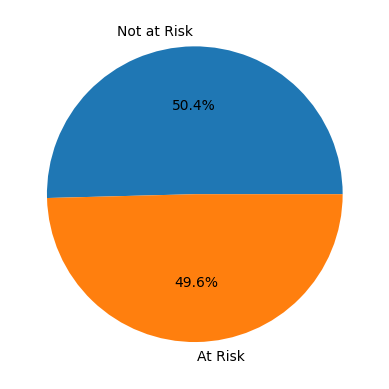

In [18]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

### SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print(X_train_smote.shape, Y_train_smote.shape)

(8066, 12) (8066,)


In [20]:
Y_train_smote.value_counts()

Risk
0    4033
1    4033
Name: count, dtype: int64

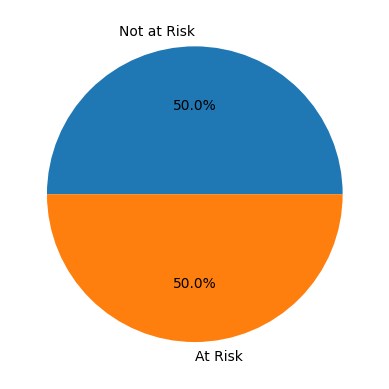

In [21]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

In [22]:
X_train_smote

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,1,2,38,3,12,1,2,2,1,0,1,1
1,1,26,34,34,3,1,0,1,1,0,0,2
2,0,40,60,21,17,0,2,0,1,0,0,2
3,0,26,5,12,0,0,0,0,1,0,0,0
4,0,20,51,65,5,0,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8061,0,43,51,1,0,0,0,1,1,0,0,0
8062,0,25,68,19,4,0,0,0,0,0,0,1
8063,0,41,62,37,16,0,0,1,0,1,0,0
8064,0,37,17,50,5,1,0,2,0,1,0,0


In [23]:
Y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
8061    1
8062    1
8063    1
8064    1
8065    1
Name: Risk, Length: 8066, dtype: int64

In [24]:
X_test

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
3413,0,32,11,53,7,0,1,0,1,1,0,0
5831,1,41,59,38,8,0,1,2,0,1,1,1
392,0,31,57,6,4,0,0,2,1,1,0,0
5186,1,22,8,22,9,0,0,0,1,1,0,1
6459,1,40,35,53,11,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9244,1,5,65,53,1,0,0,2,0,0,0,0
4519,1,44,67,43,12,0,0,1,1,1,1,1
49,0,44,25,69,4,0,1,1,0,0,1,0
2334,1,49,40,21,18,0,2,1,1,0,0,1


In [25]:
Y_test

3413    0
5831    0
392     1
5186    0
6459    1
       ..
9244    0
4519    0
49      0
2334    0
6656    0
Name: Risk, Length: 2000, dtype: int64

## Model Training and Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(X_train_smote, Y_train_smote)

y_train_pred = lr.predict(X_train_smote)

y_test_pred = lr.predict(X_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.511
	Precision = 0.511
	Recall = 0.511
	F1-Score = 0.511
Testing Scores:
	Accuracy = 0.493
	Precision = 0.485
	Recall = 0.492
	F1-Score = 0.489


### Naive Bayes

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train_smote, Y_train_smote)

y_train_pred = mnb.predict(X_train_smote)

y_test_pred = mnb.predict(X_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.502
	Precision = 0.502
	Recall = 0.497
	F1-Score = 0.5
Testing Scores:
	Accuracy = 0.505
	Precision = 0.497
	Recall = 0.518
	F1-Score = 0.507


### Decision Tree

In [30]:
dt = DecisionTreeClassifier()

dt.fit(X_train_smote, Y_train_smote)

y_train_pred = dt.predict(X_train_smote)

y_test_pred = dt.predict(X_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.508
	Precision = 0.5
	Recall = 0.487
	F1-Score = 0.494


### Random Forest

In [31]:
rf = RandomForestClassifier()

rf.fit(X_train_smote, Y_train_smote)

y_train_pred = dt.predict(X_train_smote)

y_test_pred = dt.predict(X_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.508
	Precision = 0.5
	Recall = 0.487
	F1-Score = 0.494


### Support Vector Machine

In [32]:
svm = SVC()

svm.fit(X_train_smote, Y_train_smote)

y_train_pred = dt.predict(X_train_smote)

y_test_pred = dt.predict(X_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.508
	Precision = 0.5
	Recall = 0.487
	F1-Score = 0.494


Text(110.44999999999997, 0.5, 'predicted class axis')

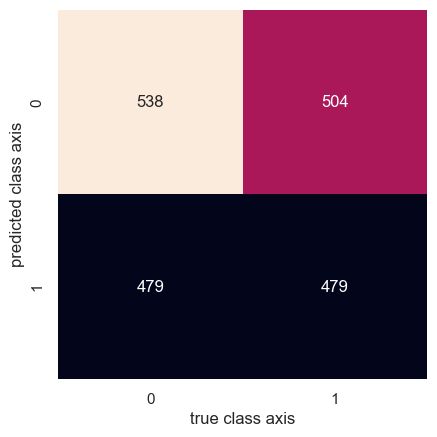

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
sb.set()
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
confusionmt = confusion_matrix(Y_test,y_test_pred)
sb.heatmap(confusionmt.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true class axis')
plt.ylabel('predicted class axis')

In [34]:
import pickle
with open ('../static/model/model.pickle', 'wb') as file:
    pickle.dump(rf, file)

In [43]:
import numpy as np

# Check SHAP values for a specific feature
shap_values_array = np.array(shap_values_sample)  # Convert SHAP values to a NumPy array
print(np.mean(np.abs(shap_values_array), axis=0))  # Mean absolute SHAP values for each feature


[[0.01824445 0.01824445]
 [0.04339871 0.04339871]
 [0.04185081 0.04185081]
 [0.04120907 0.04120907]
 [0.04137353 0.04137353]
 [0.01575584 0.01575584]
 [0.02340513 0.02340513]
 [0.02569612 0.02569612]
 [0.01700808 0.01700808]
 [0.01875782 0.01875782]
 [0.01744357 0.01744357]
 [0.02248954 0.02248954]]


In [44]:
feature_importances = rf.feature_importances_
print(sorted(zip(X_train_sample.columns, feature_importances), key=lambda x: x[1], reverse=True))


[('Previous Academic Performance (%)', np.float64(0.1943196036598453)), ('Course Engagement (%)', np.float64(0.19066771430639512)), ('Attendance Rate (%)', np.float64(0.1841396912699464)), ('Study Hours', np.float64(0.13776977803549725)), ('Mother Qualification', np.float64(0.05358371211901672)), ('Socioeconomic Status', np.float64(0.04867583105235079)), ('Father Qualification', np.float64(0.045448056823989134)), ('Health Issues', np.float64(0.03027585599178587)), ('Disciplinary Actions', np.float64(0.029191595675098148)), ('Extracurricular', np.float64(0.02868473300041611)), ('Learning Disabilities', np.float64(0.02865424952710984)), ('Gender', np.float64(0.028589178538549267))]


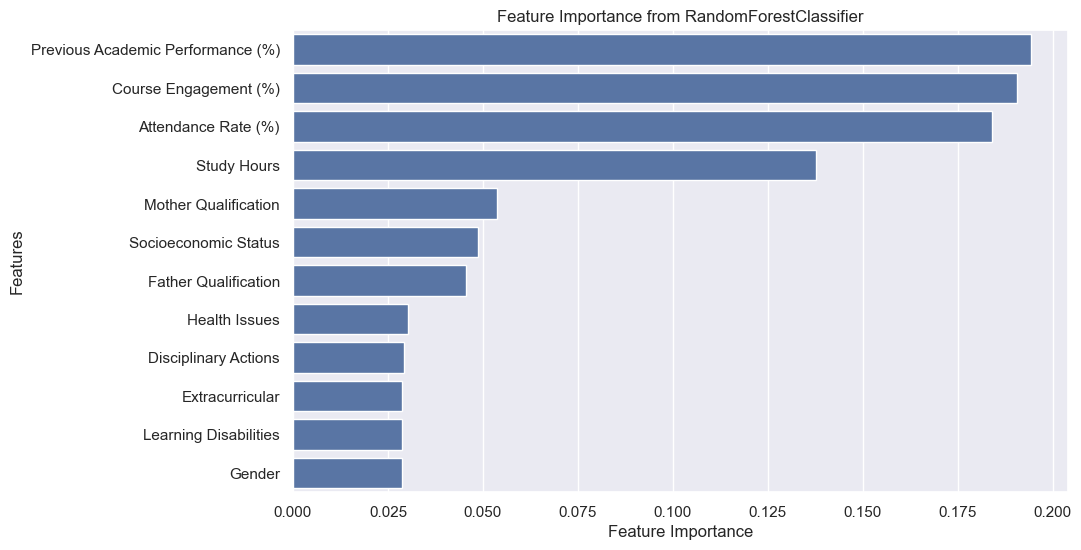

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances from the RandomForestClassifier
feature_importances = rf.feature_importances_

# Create a sorted list of feature names and their corresponding importance values
features_sorted = sorted(zip(X_train_sample.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Unzip the sorted list into separate lists for feature names and importance values
feature_names, importance_values = zip(*features_sorted)

# Create a bar plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_values, y=feature_names)

# Add plot labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier")

# Display the plot
plt.show()


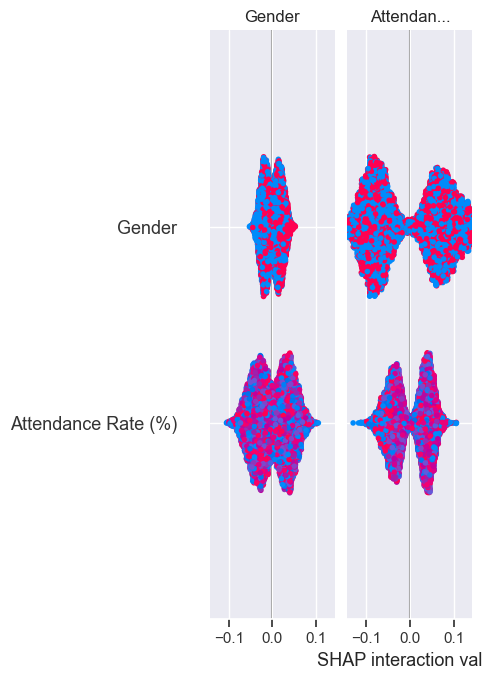

In [46]:
import shap

# Initialize the SHAP explainer for your Random Forest model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the entire dataset (can sample if the dataset is too large)
shap_values = explainer.shap_values(X_train_smote)

# Generate the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_train_smote)


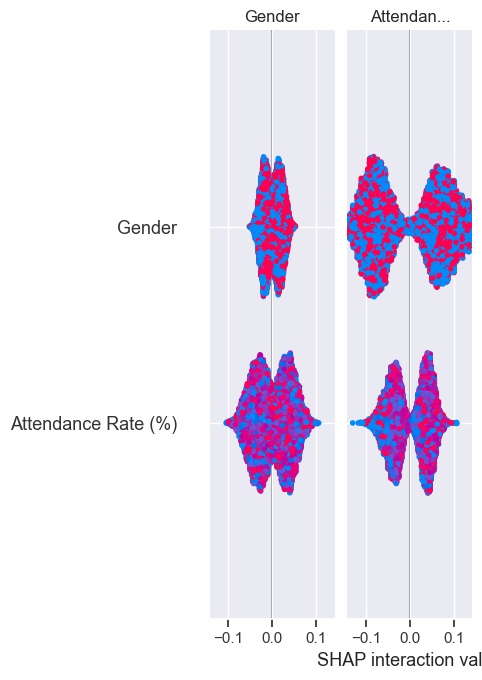

In [47]:
import shap

# Initialize the SHAP explainer for your Random Forest model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the entire dataset (can sample if the dataset is too large)
shap_values = explainer.shap_values(X_train)

# Generate the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_train)